In [1]:
import pandas as pd

In [2]:
metaData = pd.read_csv('/scratch/yte9pc/InternetArchive/Datasets/Preprocessed_Data/All Text.csv', lineterminator='\n')

In [3]:
metaData

,Unnamed: 0,filePath,textLength,text,language
0,0,/scratch/yte9pc/InternetArchive/Datasets/longt...,51491,��CEL ARA�TIRMALARDA METODOLOJ� SORUNLARI: YÜK...,Turkish
1,1,/scratch/yte9pc/InternetArchive/Datasets/longt...,23,,NaN
2,2,/scratch/yte9pc/InternetArchive/Datasets/longt...,26528,1396 ناتسبات ،موس هرامش ،مجنپ هرود 1111 ReseaR...,Persian
3,3,/scratch/yte9pc/InternetArchive/Datasets/longt...,13244,1 대한안과학회지 2015년 제 56 권 제 1 호 J Korean Ophthalm...,English
4,4,/scratch/yte9pc/InternetArchive/Datasets/longt...,11,,NaN
...,...,...,...,...,...
39989,39989,/scratch/yte9pc/InternetArchive/Datasets/longt...,34506,1 www.nt.viamedica.pl ARTYKUŁ REDAKCYJNY Marek...,Polish
39990,39990,/scratch/yte9pc/InternetArchive/Datasets/longt...,16015,Erciyes Tıp Dergisi (Erciyes Medical Journal) ...,Turkish
39991,39991,/scratch/yte9pc/InternetArchive/Datasets/longt...,18840,100 HEMŞİRELİKTE MALPRAKTİS: OLGU SUNUMLARI Ma...,Turkish
39992,39992,/scratch/yte9pc/InternetArchive/Datasets/longt...,33556,Int J Clin Exp Med 2015;8(9):14782-14792 www.i...,English


In [4]:
metaData.to_csv("metaData.csv")

## Exploratory Data Analysis

In [5]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline


Loading BokehJS ...

In [6]:
rawdata = metaData
rawdata = rawdata.dropna()
text_data = rawdata['text']

In [7]:
rawdata

,Unnamed: 0,filePath,textLength,text,language
0,0,/scratch/yte9pc/InternetArchive/Datasets/longt...,51491,��CEL ARA�TIRMALARDA METODOLOJ� SORUNLARI: YÜK...,Turkish
2,2,/scratch/yte9pc/InternetArchive/Datasets/longt...,26528,1396 ناتسبات ،موس هرامش ،مجنپ هرود 1111 ReseaR...,Persian
3,3,/scratch/yte9pc/InternetArchive/Datasets/longt...,13244,1 대한안과학회지 2015년 제 56 권 제 1 호 J Korean Ophthalm...,English
5,5,/scratch/yte9pc/InternetArchive/Datasets/longt...,4363,Setembro/Outubro 2003 Vol. IX N.º 5 443 RESUMO...,Portuguese
6,6,/scratch/yte9pc/InternetArchive/Datasets/longt...,13096,Perspectives in Nursing Science Vol. 14 No. 1...,Korean
...,...,...,...,...,...
39989,39989,/scratch/yte9pc/InternetArchive/Datasets/longt...,34506,1 www.nt.viamedica.pl ARTYKUŁ REDAKCYJNY Marek...,Polish
39990,39990,/scratch/yte9pc/InternetArchive/Datasets/longt...,16015,Erciyes Tıp Dergisi (Erciyes Medical Journal) ...,Turkish
39991,39991,/scratch/yte9pc/InternetArchive/Datasets/longt...,18840,100 HEMŞİRELİKTE MALPRAKTİS: OLGU SUNUMLARI Ma...,Turkish
39992,39992,/scratch/yte9pc/InternetArchive/Datasets/longt...,33556,Int J Clin Exp Med 2015;8(9):14782-14792 www.i...,English


In [8]:
raw_en = rawdata[rawdata.language == "English"]
raw_en

,Unnamed: 0,filePath,textLength,text,language
3,3,/scratch/yte9pc/InternetArchive/Datasets/longt...,13244,1 대한안과학회지 2015년 제 56 권 제 1 호 J Korean Ophthalm...,English
9,9,/scratch/yte9pc/InternetArchive/Datasets/longt...,21478,263 Index terms Facet Joint Steroid Injection ...,English
10,10,/scratch/yte9pc/InternetArchive/Datasets/longt...,71571,Canterbury Christ Church University’s reposito...,English
12,12,/scratch/yte9pc/InternetArchive/Datasets/longt...,12720,Copyright © 2017 Journal of Rhinology 132 요측전완...,English
13,13,/scratch/yte9pc/InternetArchive/Datasets/longt...,21468,A navegação consulta e descarregamento dos tít...,English
...,...,...,...,...,...
39984,39984,/scratch/yte9pc/InternetArchive/Datasets/longt...,95141,To link to this article : DOI : 10.1016/j.futu...,English
39986,39986,/scratch/yte9pc/InternetArchive/Datasets/longt...,8860,P: ISSN No. 0976-8602 RNI No.UPENG/...,English
39988,39988,/scratch/yte9pc/InternetArchive/Datasets/longt...,1179,Effectiveness of concrete surface treatment ma...,English
39992,39992,/scratch/yte9pc/InternetArchive/Datasets/longt...,33556,Int J Clin Exp Med 2015;8(9):14782-14792 www.i...,English


In [15]:
raw = raw_en.iloc[0]

In [17]:
#row.to_json()

In [ ]:
# "\\/scratch\\/yte9pc\\/InternetArchive\\/Datasets\\/longtail_crawl_pdf\\/ffff5f37ad611966a4152e41bf01cee81355936a.pdf"
# filepath  = '/scratch/yte9pc/InternetArchive/Datasets/longtail_crawl_pdf'

In [39]:
raw_en_template = raw_en['filePath'].str.split('/', expand = True).apply(lambda x: x.str.strip())
raw_en_template

,0,1,2,3,4,5,6
3,,scratch,yte9pc,InternetArchive,Datasets,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf
9,,scratch,yte9pc,InternetArchive,Datasets,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf
10,,scratch,yte9pc,InternetArchive,Datasets,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf
12,,scratch,yte9pc,InternetArchive,Datasets,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf
13,,scratch,yte9pc,InternetArchive,Datasets,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf
...,...,...,...,...,...,...,...
39984,,scratch,yte9pc,InternetArchive,Datasets,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf
39986,,scratch,yte9pc,InternetArchive,Datasets,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf
39988,,scratch,yte9pc,InternetArchive,Datasets,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf
39992,,scratch,yte9pc,InternetArchive,Datasets,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf


In [9]:
raw_en

,Unnamed: 0,filePath,textLength,text,language
3,3,/scratch/yte9pc/InternetArchive/Datasets/longt...,13244,1 대한안과학회지 2015년 제 56 권 제 1 호 J Korean Ophthalm...,English
9,9,/scratch/yte9pc/InternetArchive/Datasets/longt...,21478,263 Index terms Facet Joint Steroid Injection ...,English
10,10,/scratch/yte9pc/InternetArchive/Datasets/longt...,71571,Canterbury Christ Church University’s reposito...,English
12,12,/scratch/yte9pc/InternetArchive/Datasets/longt...,12720,Copyright © 2017 Journal of Rhinology 132 요측전완...,English
13,13,/scratch/yte9pc/InternetArchive/Datasets/longt...,21468,A navegação consulta e descarregamento dos tít...,English
...,...,...,...,...,...
39984,39984,/scratch/yte9pc/InternetArchive/Datasets/longt...,95141,To link to this article : DOI : 10.1016/j.futu...,English
39986,39986,/scratch/yte9pc/InternetArchive/Datasets/longt...,8860,P: ISSN No. 0976-8602 RNI No.UPENG/...,English
39988,39988,/scratch/yte9pc/InternetArchive/Datasets/longt...,1179,Effectiveness of concrete surface treatment ma...,English
39992,39992,/scratch/yte9pc/InternetArchive/Datasets/longt...,33556,Int J Clin Exp Med 2015;8(9):14782-14792 www.i...,English


In [12]:
#raw_merge = pd.concat([raw_en_template, raw_en], axis = 1)
#raw_merge 

In [ ]:
raw_merge.to_csv('myraw_merge.csv')

In [37]:
mycolumn = ['dir6', 'dir7', 'text', 'language']

In [38]:
raw_my = raw_merge[mycolumn]

In [41]:
raw_my 

,dir6,dir7,text,language
3,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,1 대한안과학회지 2015년 제 56 권 제 1 호 J Korean Ophthalm...,English
9,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,263 Index terms Facet Joint Steroid Injection ...,English
10,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,Canterbury Christ Church University’s reposito...,English
12,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,Copyright © 2017 Journal of Rhinology 132 요측전완...,English
13,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,A navegação consulta e descarregamento dos tít...,English
...,...,...,...,...
39984,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,To link to this article : DOI : 10.1016/j.futu...,English
39986,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,P: ISSN No. 0976-8602 RNI No.UPENG/...,English
39988,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,Effectiveness of concrete surface treatment ma...,English
39992,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,Int J Clin Exp Med 2015;8(9):14782-14792 www.i...,English


In [45]:
raw_my_longtail = raw_my[raw_my.dir6 == "longtail_crawl_pdf"]
raw_my_longtail 

,dir6,dir7,text,language
3,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,1 대한안과학회지 2015년 제 56 권 제 1 호 J Korean Ophthalm...,English
9,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,263 Index terms Facet Joint Steroid Injection ...,English
10,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,Canterbury Christ Church University’s reposito...,English
12,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,Copyright © 2017 Journal of Rhinology 132 요측전완...,English
13,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,A navegação consulta e descarregamento dos tít...,English
...,...,...,...,...
39984,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,To link to this article : DOI : 10.1016/j.futu...,English
39986,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,P: ISSN No. 0976-8602 RNI No.UPENG/...,English
39988,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,Effectiveness of concrete surface treatment ma...,English
39992,longtail_crawl_pdf,ffff5f37ad611966a4152e41bf01cee81355936a.pdf,Int J Clin Exp Med 2015;8(9):14782-14792 www.i...,English


In [8]:
#text_data = raw_my_longtail['text']

In [26]:
raw_en_100 = raw_en[1:3]
text_data = raw_en_100['text'] 
text_data 

9     263 Index terms Facet Joint Steroid Injection ...
10    Canterbury Christ Church University’s reposito...
Name: text, dtype: object

In [10]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [32]:
!{sys.executable} -m spacy download en

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.0 MB 5.2 MB/s eta 0:00:01
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=bebc6e81330fa9ee7c8b2a0a8e25edbfe155bb429840317dc9a1f70902418553
  Stored in directory: /tmp/pip-ephem-wheel-cache-st8h4f0q/wheels/b7/0d/f0/7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/hc5hq/.local/lib/python3.7/site-packages/en_core_web_sm -->
/home/hc5hq/.local/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [34]:
## import dataset

In [11]:
raw = raw_en[:1000]
raw

,Unnamed: 0,filePath,textLength,text,language
3,3,/scratch/yte9pc/InternetArchive/Datasets/longt...,13244,1 대한안과학회지 2015년 제 56 권 제 1 호 J Korean Ophthalm...,English
9,9,/scratch/yte9pc/InternetArchive/Datasets/longt...,21478,263 Index terms Facet Joint Steroid Injection ...,English
10,10,/scratch/yte9pc/InternetArchive/Datasets/longt...,71571,Canterbury Christ Church University’s reposito...,English
12,12,/scratch/yte9pc/InternetArchive/Datasets/longt...,12720,Copyright © 2017 Journal of Rhinology 132 요측전완...,English
13,13,/scratch/yte9pc/InternetArchive/Datasets/longt...,21468,A navegação consulta e descarregamento dos tít...,English
...,...,...,...,...,...
2795,2795,/scratch/yte9pc/InternetArchive/Datasets/longt...,16418,"대한외과학회지：제 76 권 제 1 호 □ 원 저 □ Vol. 76, No. 1, ...",English
2797,2797,/scratch/yte9pc/InternetArchive/Datasets/longt...,5893,급성 횡문근융해증은 골격근 손상으로 인해 세포 내 물질이 세포 외와 혈장으로 유리되...,English
2800,2800,/scratch/yte9pc/InternetArchive/Datasets/longt...,12597,www.jkfas.org pISSN 1738-3757 eISSN 2288-85...,English
2801,2801,/scratch/yte9pc/InternetArchive/Datasets/longt...,8825,58 BRIEF REPORTS F.P. Jonker: The genus Rhizop...,English


In [12]:
## Tokenize sentences and clean
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 

In [13]:
## convert to list
data = raw.text.values.tolist()
data_words = list(sent_to_words(data))
#print(data_words[:1])

In [13]:
## Build the Bigram, Trigram Models and Lemmatize

In [14]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [15]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [19]:
## Build the Topic Model

In [16]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.011*"case" + 0.006*"law" + 0.006*"court" + 0.005*"article" + '
  '0.005*"sound" + 0.005*"environment" + 0.004*"work" + 0.004*"state" + '
  '0.004*"producer" + 0.004*"new"'),
 (1,
  '0.011*"study" + 0.009*"value" + 0.008*"result" + 0.007*"high" + '
  '0.006*"level" + 0.006*"table" + 0.006*"year" + 0.006*"number" + '
  '0.005*"analysis" + 0.005*"group"'),
 (2,
  '0.014*"asthma" + 0.010*"effect" + 0.009*"cell" + 0.007*"concentration" + '
  '0.005*"virus" + 0.005*"mutation" + 0.005*"surface" + 0.004*"isolate" + '
  '0.004*"gene" + 0.004*"water"'),
 (3,
  '0.023*"patient" + 0.014*"case" + 0.011*"table" + 0.011*"fig" + '
  '0.008*"treatment" + 0.007*"show" + 0.006*"group" + 0.005*"clinical" + '
  '0.005*"diagnosis" + 0.005*"result"')]


In [17]:
## Understand the dominant topic and its percentage contribution in each document
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.7465,"patient, case, table, fig, treatment, show, gr...","[calculate, volume, lacrimal, gland, normal, k..."
1,1,3.0,0.9538,"patient, case, table, fig, treatment, show, gr...","[index, term, fluoroscopy, copyright, radiolog..."
2,2,0.0,0.8088,"case, law, court, article, sound, environment,...","[research, output, http, create, canterbury, p..."
3,3,3.0,0.8043,"patient, case, table, fig, treatment, show, gr...","[전두부피판을, nasal, defect, free, flap, surgery, p..."
4,4,0.0,0.7027,"case, law, court, article, sound, environment,...","[codigo, note, representing, head, note, repre..."
5,5,3.0,0.6275,"patient, case, table, fig, treatment, show, gr...","[rights_reserve, treatment, type, fere, case, ..."
6,6,3.0,0.8485,"patient, case, table, fig, treatment, show, gr...","[oriental, medicine, association, term, nc, no..."
7,7,3.0,0.6207,"patient, case, table, fig, treatment, show, gr...","[infection, 골반염과, 환자에서, gonorrheaee, submit, c..."
8,8,3.0,0.8938,"patient, case, table, fig, treatment, show, gr...","[필요하다, 수술적, 병변으로, 고실인상, tympanosquamous, 임상증상은..."
9,9,1.0,0.8330,"study, value, result, high, level, table, year...","[health_science, ac_ir, ijhs, early_detection,..."


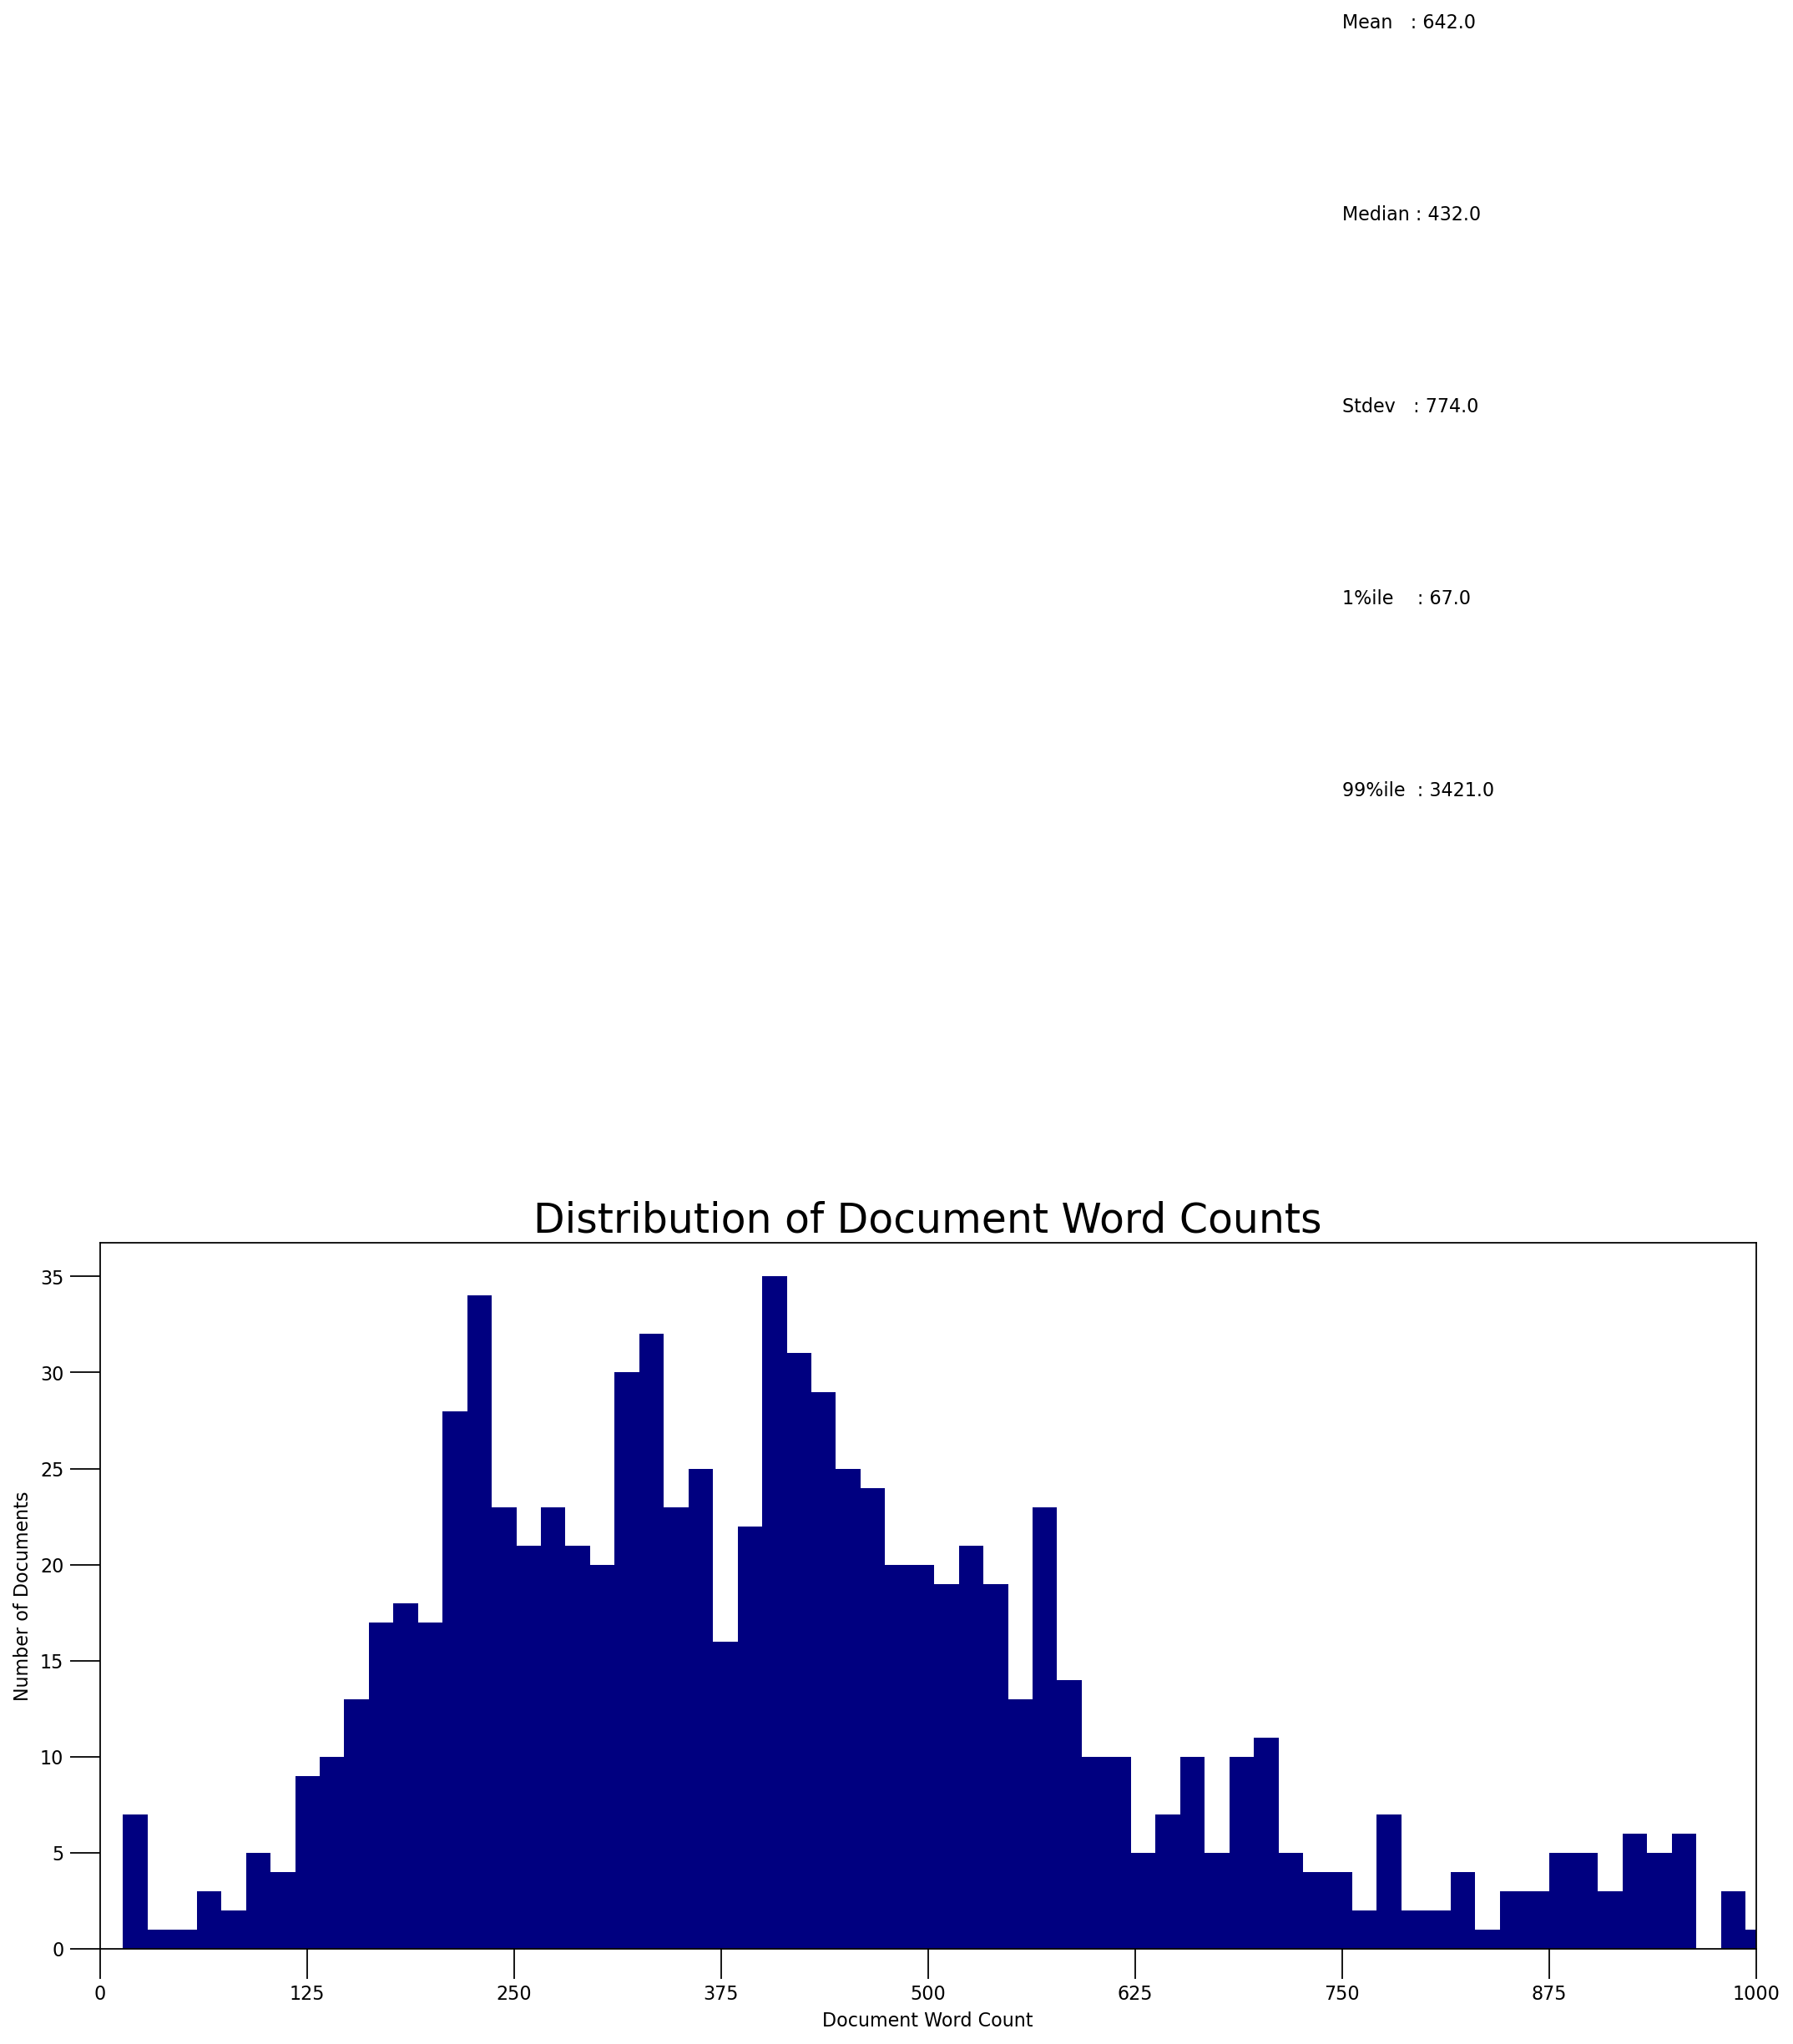

In [18]:
## Frequency districution of word counts in documents
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

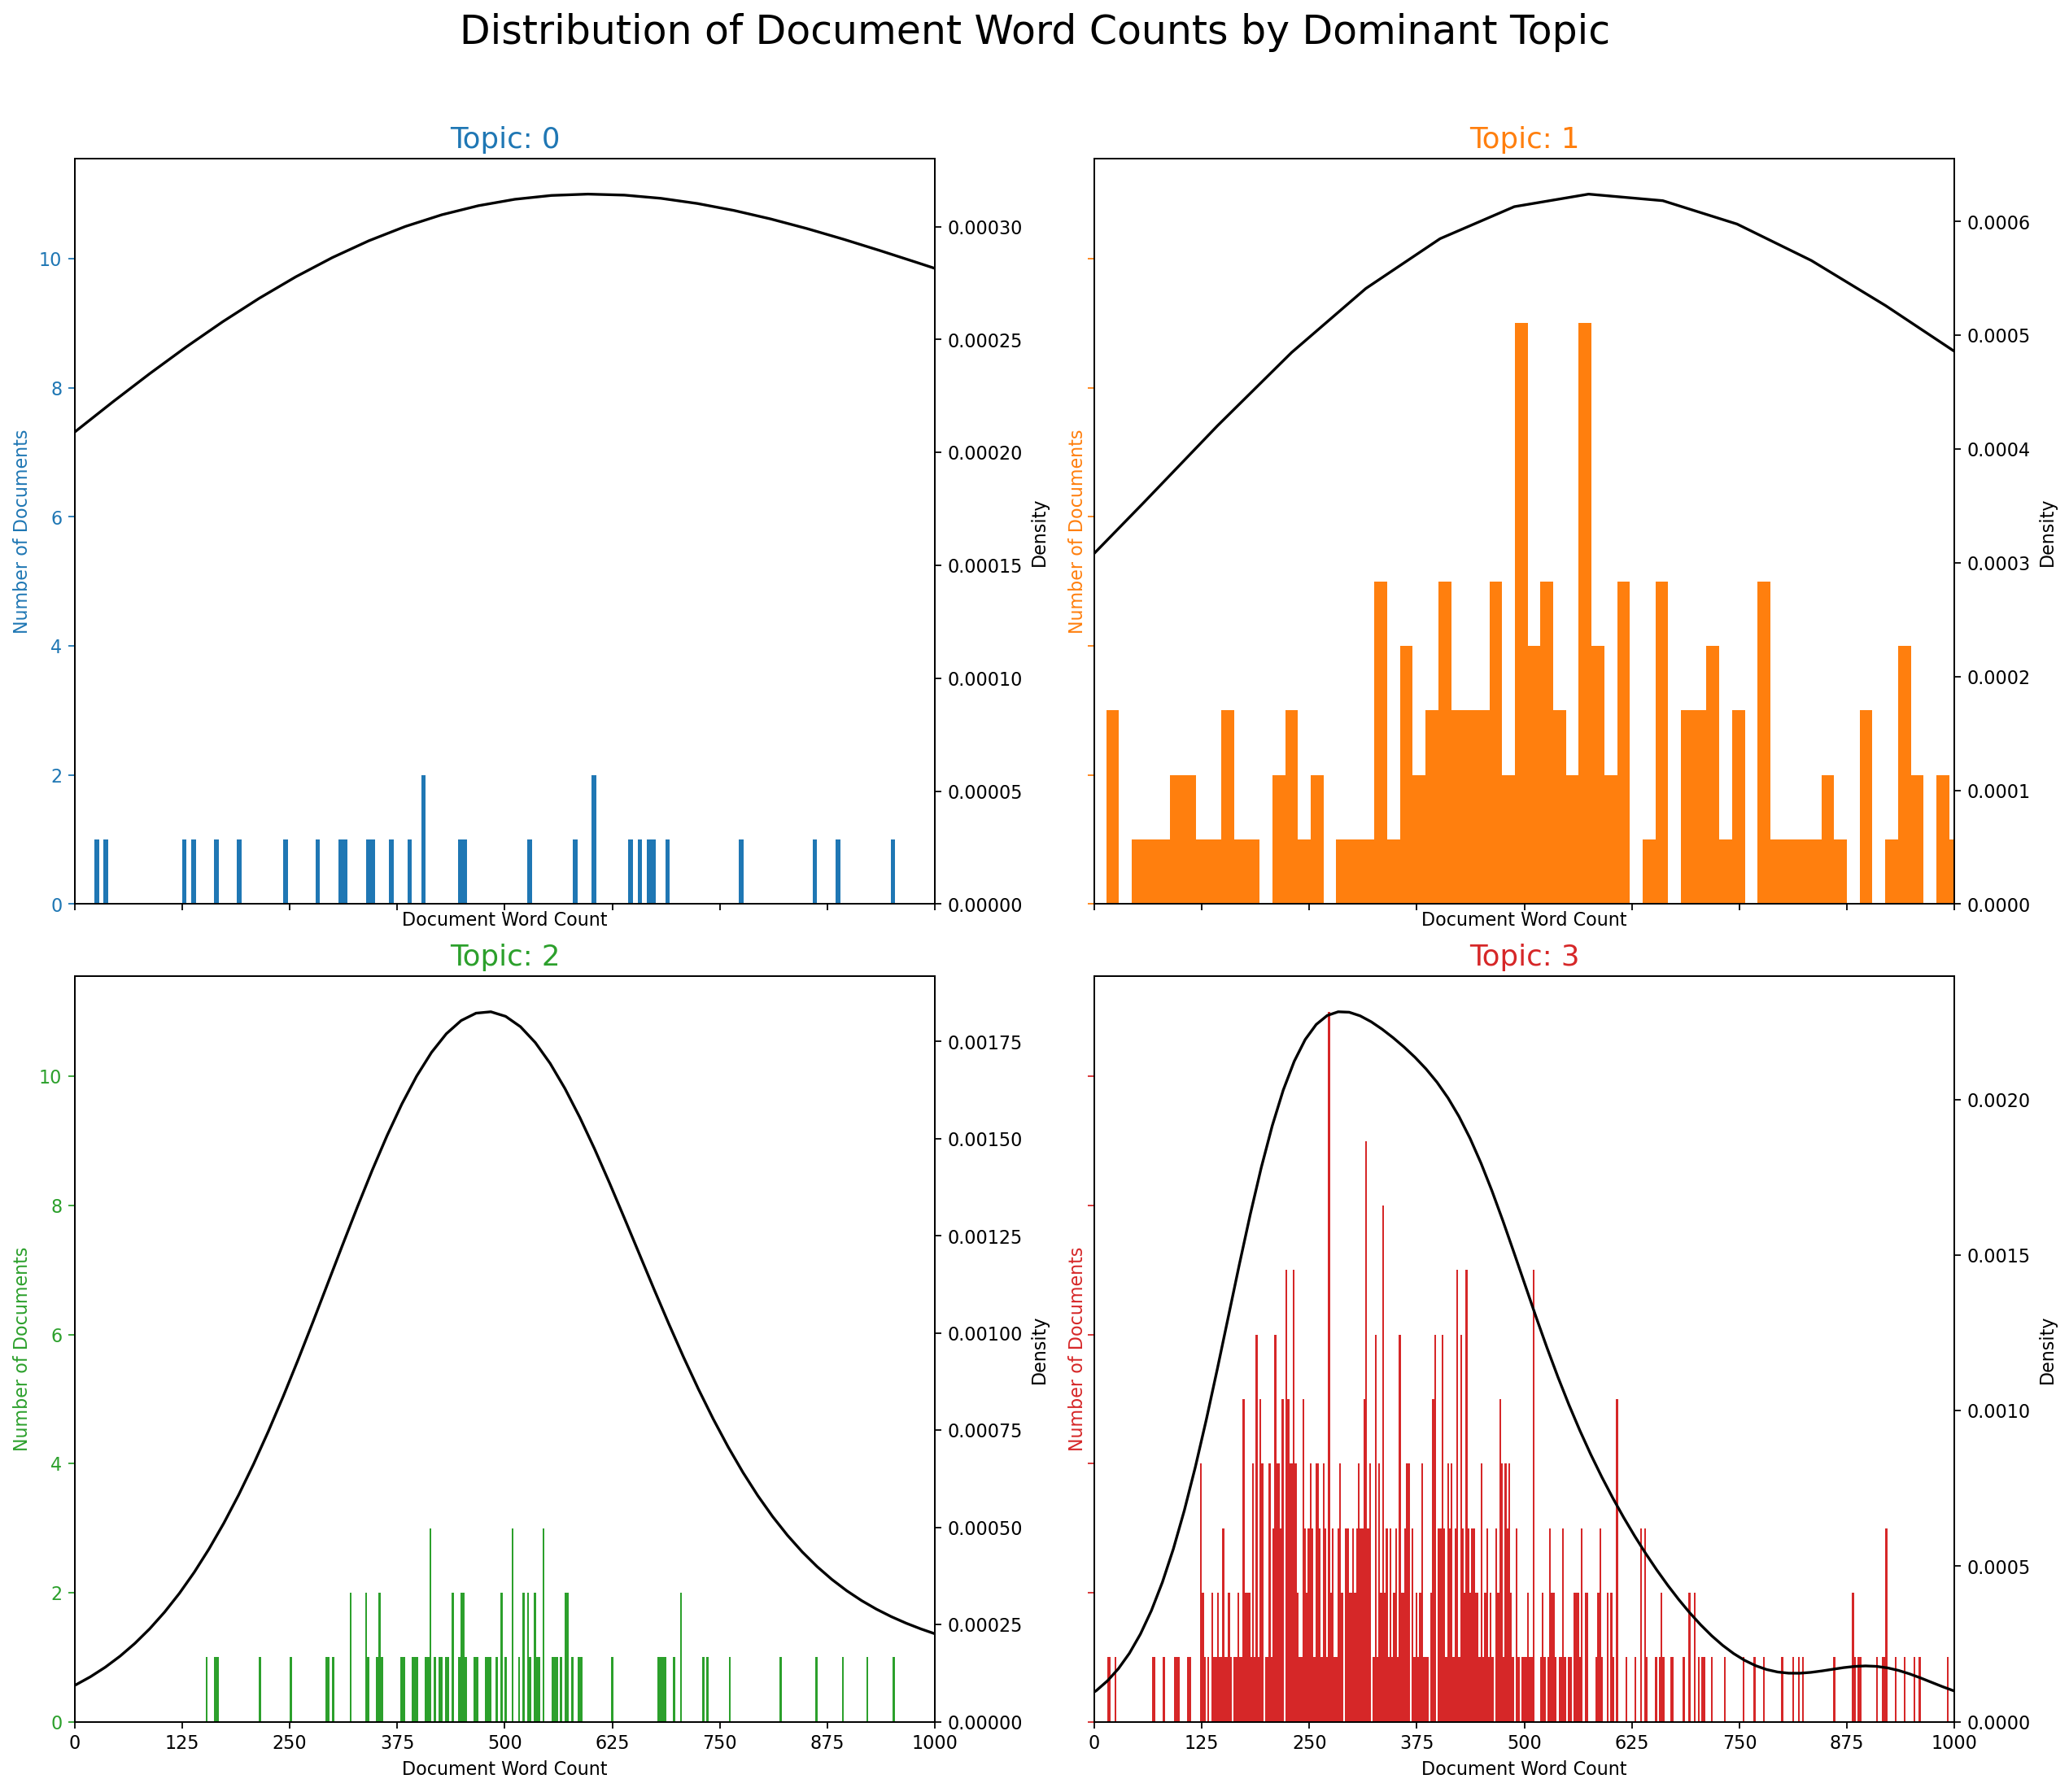

In [19]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [20]:
## Word Clouds of Top N Keywords in Each Topic

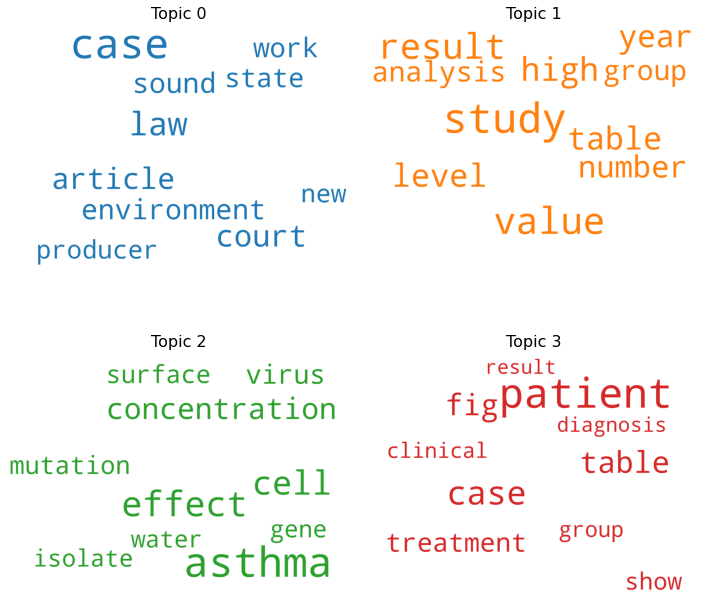

In [21]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

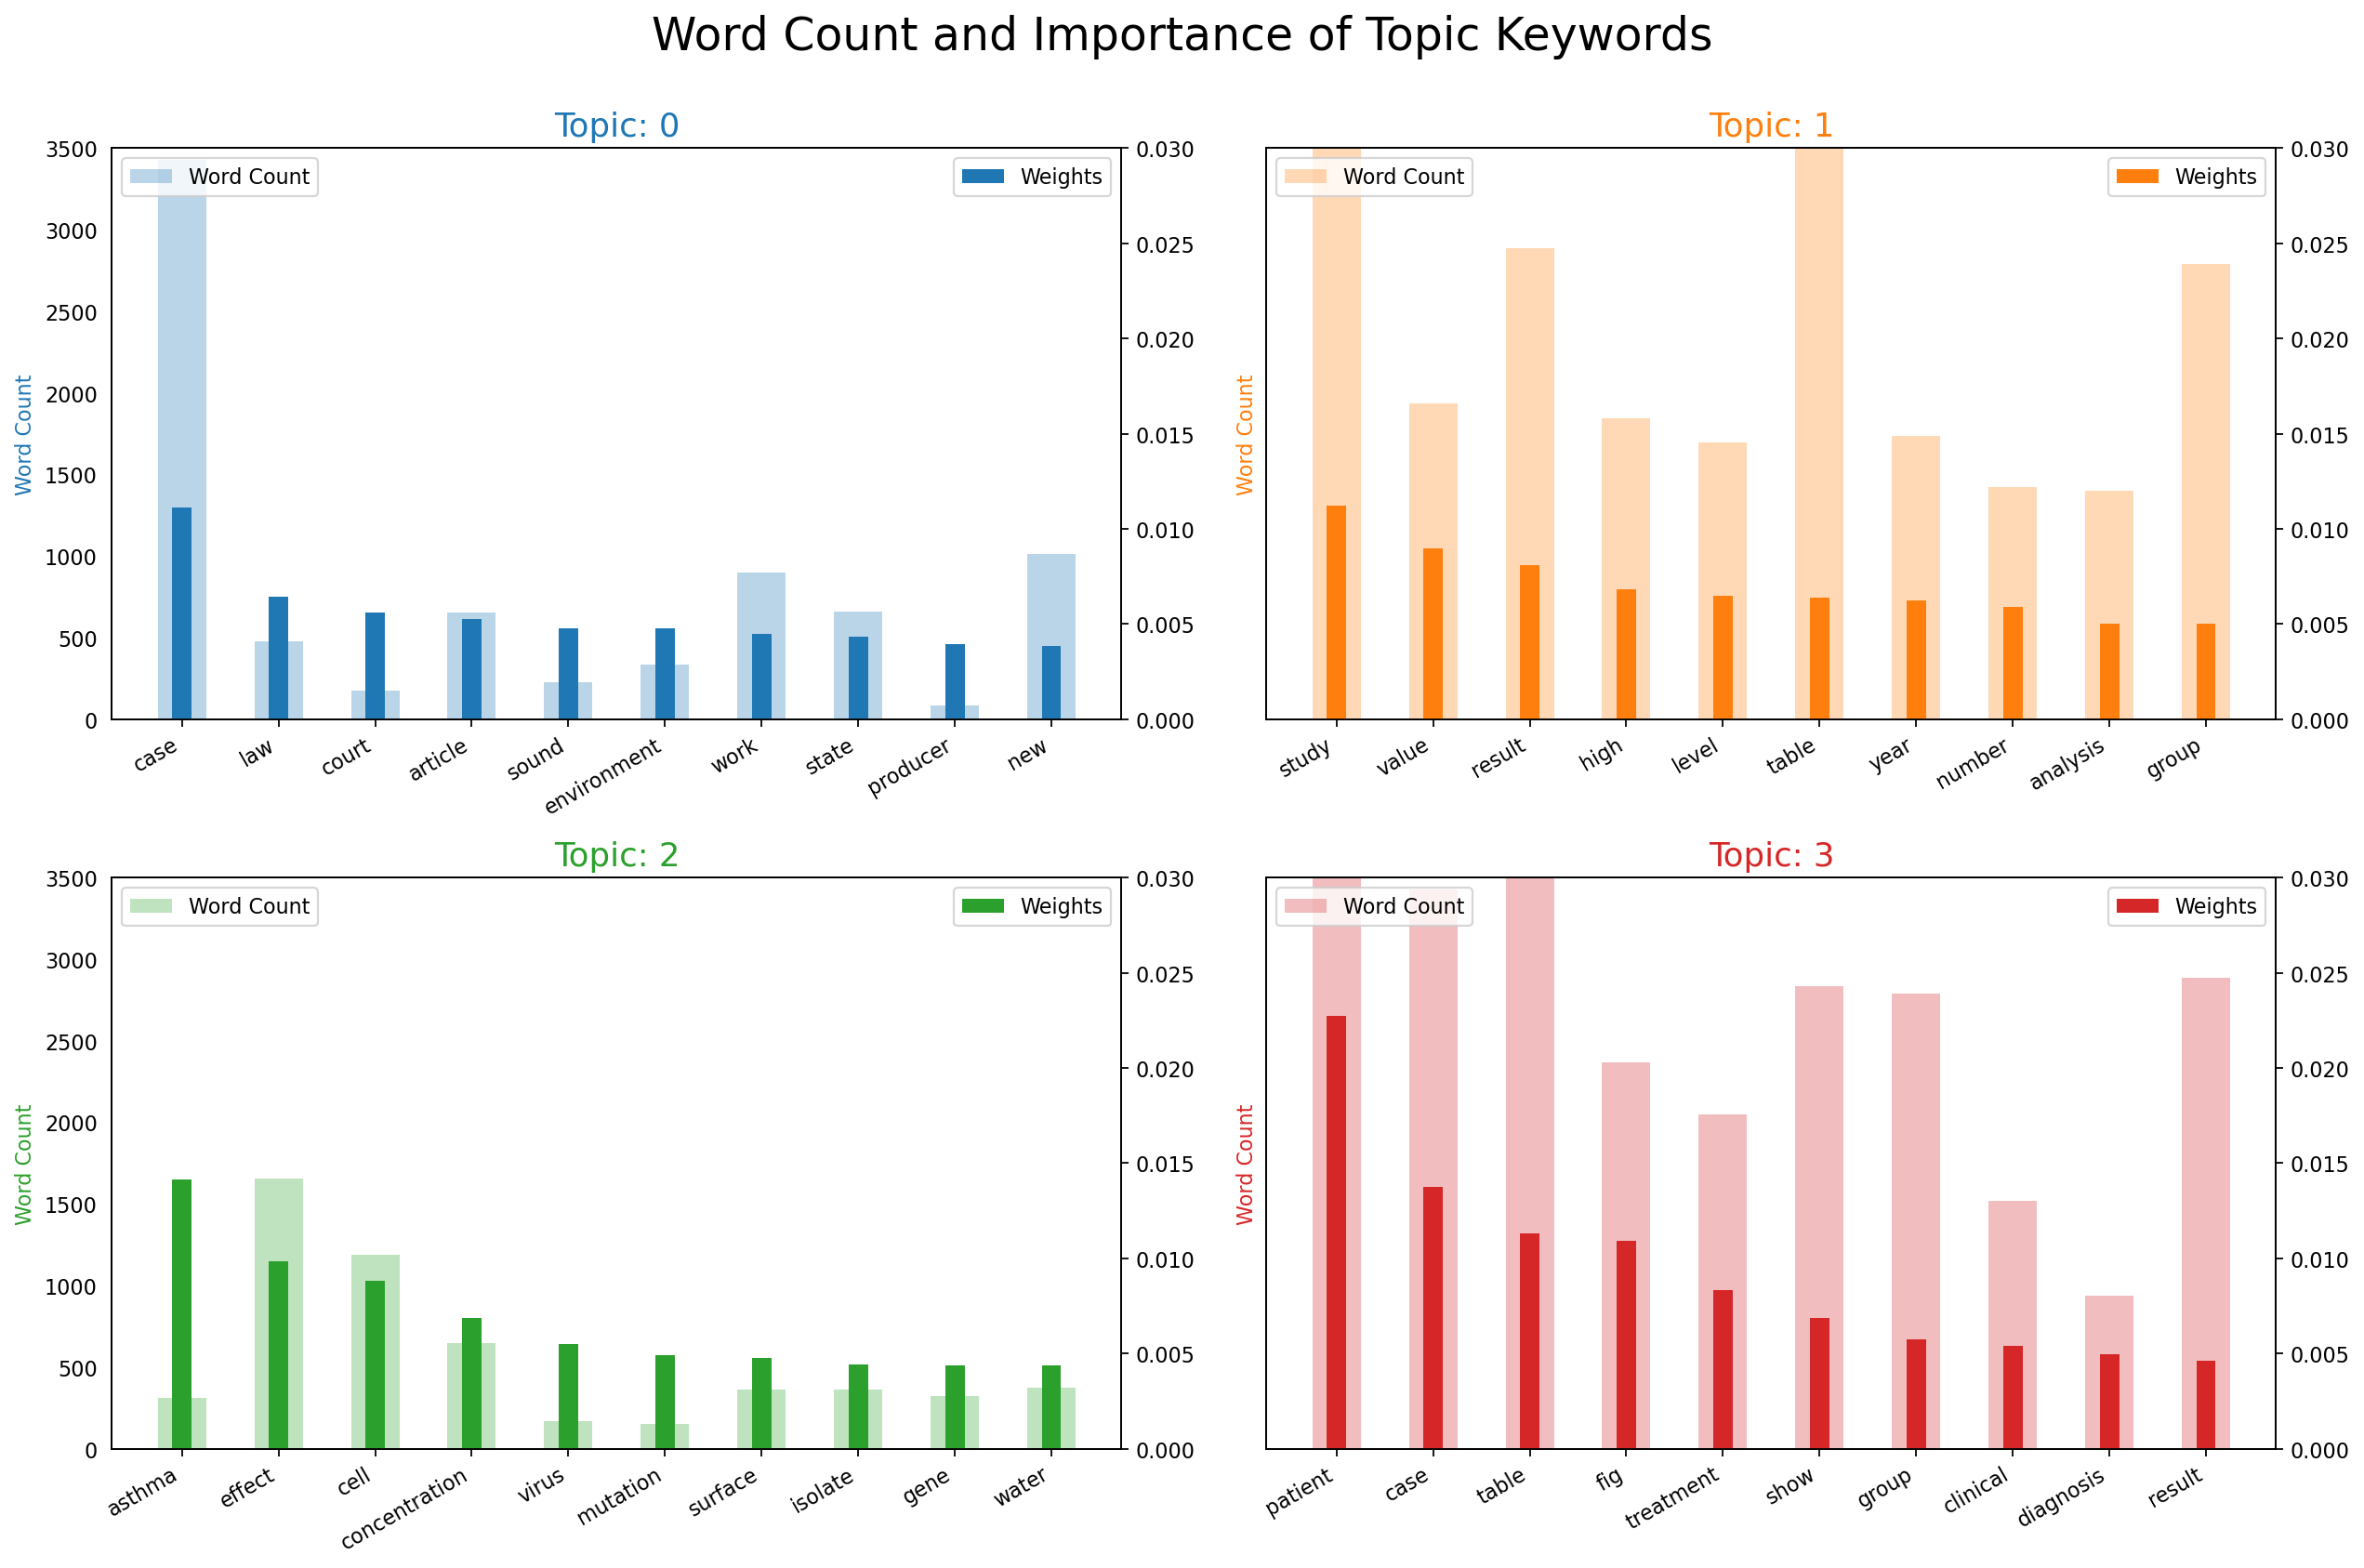

In [22]:
## Word Counts of TOpic Keywords
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/p

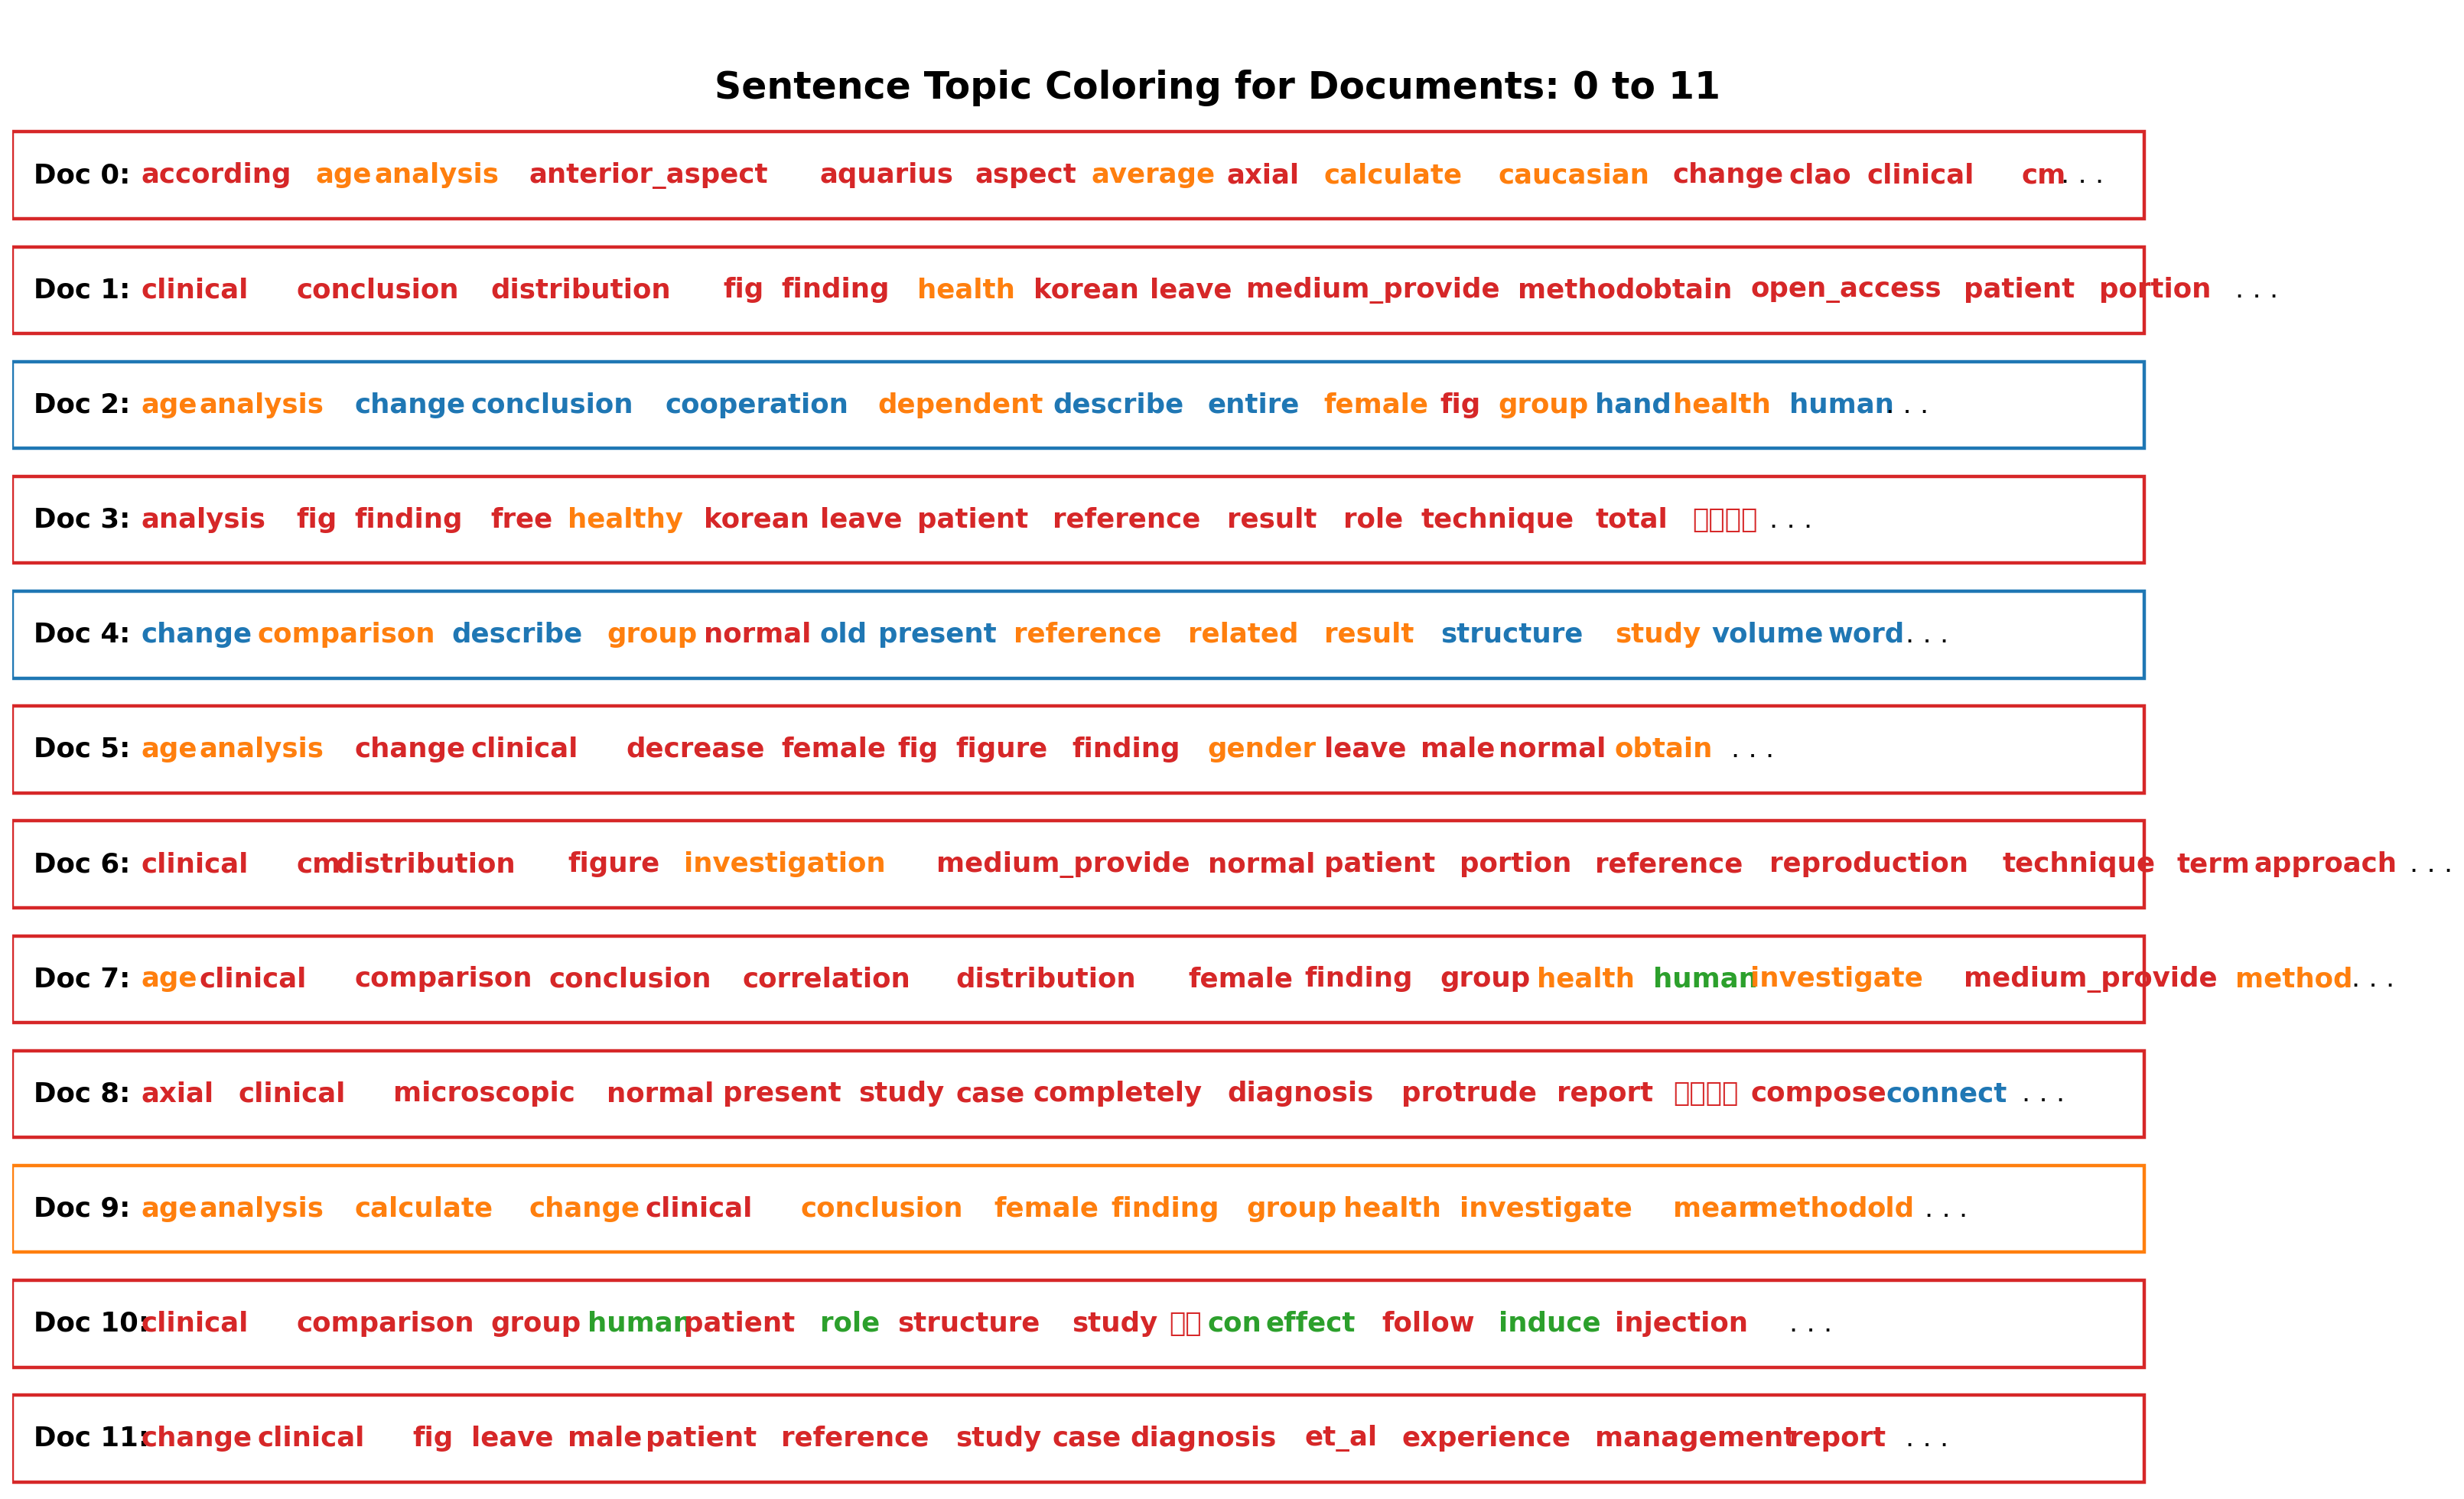

In [23]:
## Sentence Chart Colored by Topic
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [24]:
## The most discussed topics in the documents
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

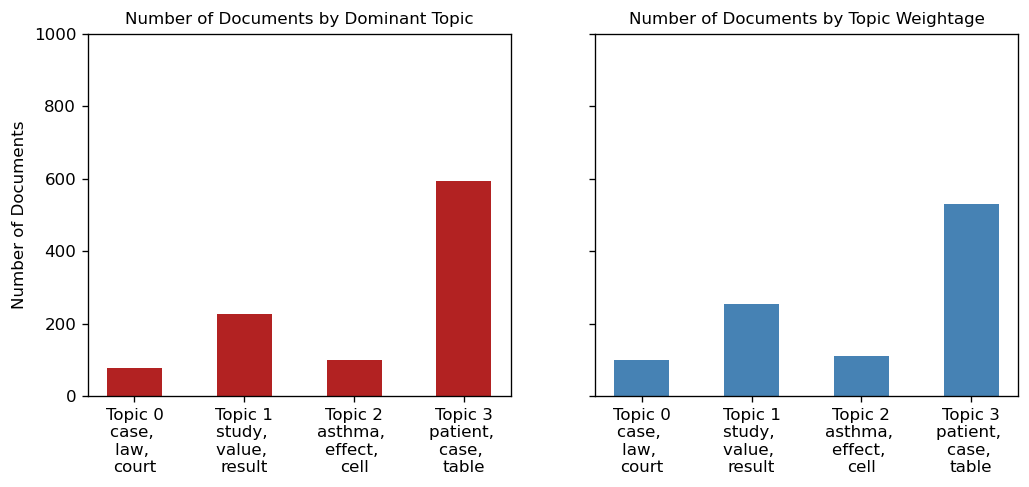

In [25]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [26]:
## t-SNE Clustering CHart
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 998 samples in 0.001s...
[t-SNE] Computed neighbors for 998 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 998 / 998
[t-SNE] Mean sigma: 0.029450
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.758961
[t-SNE] KL divergence after 1000 iterations: 0.358094


Loading BokehJS ...

In [27]:
## pyLDAVis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.094748 -0.202933       1        1  34.394474
1     -0.107353 -0.105010       2        1  33.497475
0     -0.213042  0.140264       3        1  21.375008
2      0.225647  0.167680       4        1  10.733043, topic_info=          Term         Freq        Total Category  logprob  loglift
74     patient  5674.000000  5674.000000  Default  30.0000  30.0000
207       case  4622.000000  4622.000000  Default  29.0000  29.0000
30         fig  2450.000000  2450.000000  Default  28.0000  28.0000
4033    asthma   973.000000   973.000000  Default  27.0000  27.0000
237     effect  1598.000000  1598.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
2119     blood   198.665364   617.100765   Topic4  -5.8485   1.0984
31      figure   226.042127  1036.986188   Topic4  -5.7194   0.7085
1305  positive   179.587640   606.340313   Topic4  -5.9495   1.0151
20    decrease   170.221797   569.971477   Topic4  -6.0031   1.0234
102      table   162.644807  4027.694990   Topic4  -6.0486  -0.9775

[279 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
18646      4  0.986050      aard
499        3  0.996424       act
2094       1  0.942131     acute
2094       2  0.056618     acute
15556      4  0.991918  adhesive
...      ...       ...       ...
385        2  0.742441      year
2432       1  0.997445       경우에
6985       1  0.995534       병변의
433        1  0.998244       시행한
186        1  0.997529      환자에서

[414 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

In [ ]:
https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [ ]:
https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/